# Homework 3
## Mengxiang Jiang

The majority of the code here comes from the [Companion Jupyter notebooks for the book "Deep Learning with Python"](https://github.com/fchollet/deep-learning-with-python-notebooks) by François Chollet, specifically chapter 2.
If the code comes from somewhere else it will have a source linked to the original.\
[Video Link](https://youtu.be/ZBcMe8eCq24)

**Loading the MNIST dataset in Keras**

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

2023-02-10 03:57:58.128895: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-10 03:57:58.203348: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-10 03:57:58.542398: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/mengxiang/miniconda3/envs/tf/lib/
2023-02-10 03:57:58.542433: W tensorflow/compiler/xla/str

**Preparing the image data**

In [2]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**imports for network architecture**

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

**function for generating and compiling a model with variable number of neurons in the first hidden layer**

In [4]:
def single_layer_model(neurons):
    model = keras.Sequential([
        layers.Dense(neurons, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(
        optimizer="rmsprop",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model


**generate models from 4 neurons up to 512, evaluate them, and store the results**

In [5]:
neurons = [4, 8, 16, 32, 64, 128, 256, 512]
train_accuracies = []
test_accuracies = []
for n in neurons:
    model = single_layer_model(n)
    model.fit(train_images, train_labels, epochs=5, batch_size=128)
    train_loss, train_acc = model.evaluate(train_images, train_labels)
    train_accuracies.append(train_acc)
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    test_accuracies.append(test_acc)


2023-02-10 03:57:59.355959: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-10 03:57:59.359711: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-10 03:57:59.359791: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-10 03:57:59.360407: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuil

Epoch 1/5


2023-02-10 03:58:00.438111: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-02-10 03:58:00.440038: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fec35eb5100 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-02-10 03:58:00.440053: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2023-02-10 03:58:00.442392: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-02-10 03:58:00.494185: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 [==============================] - 2s 2ms/step - loss: 1.6569 - accuracy: 0.3867
Epoch 2/5
469/469 [==============================] - 1s 1ms/step - loss: 0.9280 - accuracy: 0.7196
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6692 - accuracy: 0.8118
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.6062 - accuracy: 0.8282
Epoch 5/5
313/313 [==============================] - 0s 742us/step - loss: 0.5498 - accuracy: 0.8490
Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.7893 - accuracy: 0.7866
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3844 - accuracy: 0.8909
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3399 - accuracy: 0.9029
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3197 - accuracy: 0.9090
Epoch 5/5
313/313 [==============================] - 0s 889us/step - loss: 0.2994 - accuracy: 0.9153
Epoch 1/5
469/46

**pandas dataframe of results**

In [6]:
import pandas as pd

data = {
    'Number of Neurons': neurons,
    'Training Accuracy': train_accuracies,
    'Testing Accuracy': test_accuracies
}

df1 = pd.DataFrame(data)
print(df1)

   Number of Neurons  Training Accuracy  Testing Accuracy
0                  4           0.841317            0.8490
1                  8           0.916283            0.9153
2                 16           0.943067            0.9410
3                 32           0.957000            0.9548
4                 64           0.973600            0.9664
5                128           0.984250            0.9750
6                256           0.988717            0.9769
7                512           0.992517            0.9789


**plot of results**

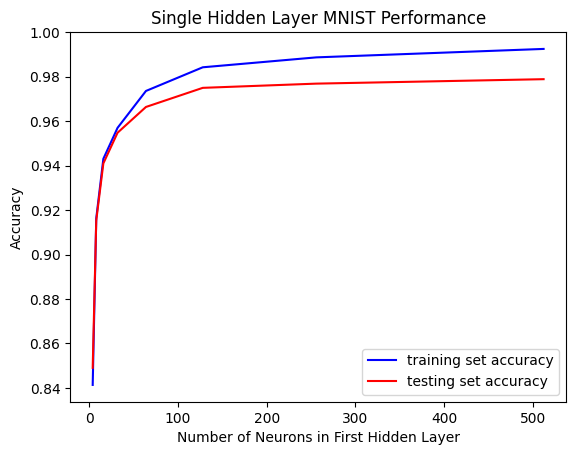

In [7]:
import matplotlib.pyplot as plt

plt.title("Single Hidden Layer MNIST Performance")
plt.xlabel("Number of Neurons in First Hidden Layer")
plt.ylabel("Accuracy")
plt.plot(neurons, train_accuracies, c='blue', label='training set accuracy')
plt.plot(neurons, test_accuracies, c='red', label='testing set accuracy')
plt.legend()
plt.show()

**function for generating and compiling a model with variable number of neurons in the second hidden layer**

In [8]:
def two_layer_model(neurons):
    model = keras.Sequential([
        layers.Dense(128, activation="relu"),
        layers.Dense(neurons, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(
        optimizer="rmsprop",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

**generate models from 4 neurons up to 512, evaluate them, and store the results**

In [9]:
neurons = [4, 8, 16, 32, 64, 128, 256, 512]
train_accuracies = []
test_accuracies = []
for n in neurons:
    model = two_layer_model(n)
    model.fit(train_images, train_labels, epochs=5, batch_size=128)
    train_loss, train_acc = model.evaluate(train_images, train_labels)
    train_accuracies.append(train_acc)
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    test_accuracies.append(test_acc)


Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 1.1789 - accuracy: 0.5788
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3390 - accuracy: 0.9089
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2172 - accuracy: 0.9398
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1710 - accuracy: 0.9530
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.1697 - accuracy: 0.9523
Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5118 - accuracy: 0.8604
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1943 - accuracy: 0.9467
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1388 - accuracy: 0.9610
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1104 - accuracy: 0.9683
Epoch 5/5
313/313 [==============================] - 0s 609us/step - loss: 0.1022 - accuracy: 0.9673
Epoch 1/

**pandas dataframe of results**

In [10]:
data = {
    'Number of Neurons': neurons,
    'Training Accuracy': train_accuracies,
    'Testing Accuracy': test_accuracies
}

df2 = pd.DataFrame(data)
print(df2)

   Number of Neurons  Training Accuracy  Testing Accuracy
0                  4           0.964767            0.9523
1                  8           0.978933            0.9673
2                 16           0.982067            0.9736
3                 32           0.987117            0.9751
4                 64           0.984750            0.9751
5                128           0.989283            0.9769
6                256           0.984433            0.9738
7                512           0.989750            0.9749


**plot of results**

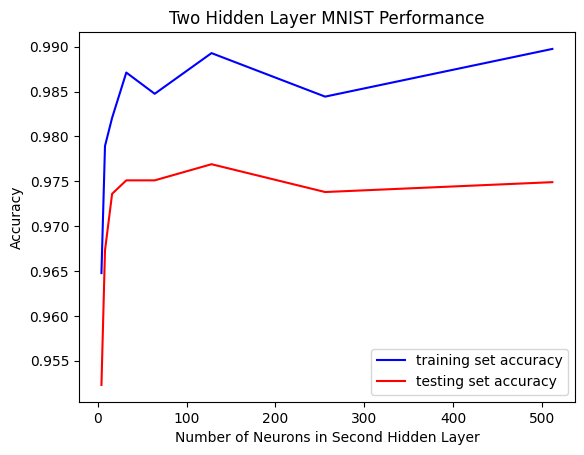

In [11]:
import matplotlib.pyplot as plt

plt.title("Two Hidden Layer MNIST Performance")
plt.xlabel("Number of Neurons in Second Hidden Layer")
plt.ylabel("Accuracy")
plt.plot(neurons, train_accuracies, c='blue', label='training set accuracy')
plt.plot(neurons, test_accuracies, c='red', label='testing set accuracy')
plt.legend()
plt.show()